https://www.transtats.bts.gov/Fields.asp?Table_ID=236

In [1]:
from __future__ import division #, print_function # Imports from __future__ since we're running Python 2

In [2]:
#%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
random_state = 0


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from datetime import datetime

from helpers.feature_engineering import dateStrToDayYear, getMappingOfSimilarCategoricalColumns, \
    compareSimilarCategoricalColumns 
from helpers.my_one_hot_encoder import MyOneHotEncoder
from helpers.py_helpers import is_number
from scipy.stats import skew, kurtosis
from helpers.outliers import MyOutliers

In [74]:
plt.style.use('classic')
plt.rc("figure", facecolor="white")

In [5]:
rng = np.random.RandomState(seed=random_state)

# Flying to New York City - Feature Exploration

In [6]:
target_col = 'IS_DELAYED'

In [7]:
path_data = os.path.realpath(os.path.join(os.getcwd(), '../Data', 'binary_train_data_numerical.csv'))
assert os.path.isfile(path_data)
path_data

'/home/student/pligor.george@gmail.com/msc_Artificial_Intelligence/dme_Data_Mining/dmedatarats/Data/binary_train_data_numerical.csv'

In [8]:
df = pd.read_csv(path_data, delimiter = ',', header=0)
df.shape

(186308, 533)

In [9]:
df.sample(10, random_state=random_state)

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,DEP_TIME,DEP_DELAY,DEP_DELAY_GROUP,DISTANCE,DISTANCE_GROUP,...,DEP_TIME_BLK_8,DEP_TIME_BLK_9,DEP_TIME_BLK_10,DEP_TIME_BLK_11,DEP_TIME_BLK_12,DEP_TIME_BLK_13,DEP_TIME_BLK_14,DEP_TIME_BLK_15,DEP_TIME_BLK_16,DEP_TIME_BLK_17
163263,3,9,27,2,199,1622.0,52.0,3.0,187.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132397,4,12,4,7,416,18.0,88.0,5.0,1176.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15778,2,6,20,1,5443,1348.0,59.0,3.0,292.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156958,4,12,2,5,71,2006.0,28.0,1.0,1990.0,8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
168959,4,11,30,3,1515,1949.0,42.0,2.0,853.0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148799,2,5,2,1,2066,1357.0,45.0,3.0,544.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152433,2,4,8,5,1310,2152.0,12.0,0.0,717.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
146704,2,6,10,5,183,1150.0,-10.0,-1.0,944.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118445,3,7,25,1,51,1013.0,13.0,0.0,4983.0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183495,2,6,28,2,5210,655.0,-5.0,-1.0,617.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.info()  #here we are verifying that everything is numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186308 entries, 0 to 186307
Columns: 533 entries, QUARTER to DEP_TIME_BLK_17
dtypes: bool(1), float64(525), int64(7)
memory usage: 756.4 MB


In [11]:
is_number("0")

True

In [12]:
columns_one_hot_encoded = np.array([col for col in df.columns if is_number(col[-1])])
columns_one_hot_encoded

array(['UNIQUE_CARRIER_0', 'UNIQUE_CARRIER_1', 'UNIQUE_CARRIER_2',
       'UNIQUE_CARRIER_3', 'UNIQUE_CARRIER_4', 'UNIQUE_CARRIER_5',
       'UNIQUE_CARRIER_6', 'UNIQUE_CARRIER_7', 'UNIQUE_CARRIER_8',
       'UNIQUE_CARRIER_9', 'UNIQUE_CARRIER_10', 'ORIGIN_0', 'ORIGIN_1',
       'ORIGIN_2', 'ORIGIN_3', 'ORIGIN_4', 'ORIGIN_5', 'ORIGIN_6',
       'ORIGIN_7', 'ORIGIN_8', 'ORIGIN_9', 'ORIGIN_10', 'ORIGIN_11',
       'ORIGIN_12', 'ORIGIN_13', 'ORIGIN_14', 'ORIGIN_15', 'ORIGIN_16',
       'ORIGIN_17', 'ORIGIN_18', 'ORIGIN_19', 'ORIGIN_20', 'ORIGIN_21',
       'ORIGIN_22', 'ORIGIN_23', 'ORIGIN_24', 'ORIGIN_25', 'ORIGIN_26',
       'ORIGIN_27', 'ORIGIN_28', 'ORIGIN_29', 'ORIGIN_30', 'ORIGIN_31',
       'ORIGIN_32', 'ORIGIN_33', 'ORIGIN_34', 'ORIGIN_35', 'ORIGIN_36',
       'ORIGIN_37', 'ORIGIN_38', 'ORIGIN_39', 'ORIGIN_40', 'ORIGIN_41',
       'ORIGIN_42', 'ORIGIN_43', 'ORIGIN_44', 'ORIGIN_45', 'ORIGIN_46',
       'ORIGIN_47', 'ORIGIN_48', 'ORIGIN_49', 'ORIGIN_50', 'ORIGIN_51',
       'ORIGIN_

In [13]:
columns_not_one_hot = np.array([col for col in df.columns if not is_number(col[-1])])
columns_not_one_hot

array(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_NUM',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_GROUP', 'DISTANCE',
       'DISTANCE_GROUP', 'IS_DELAYED', 'YDAY'], 
      dtype='|S15')

### Note for one hot encoded values
We are not exploring the skewness and kurtosis, or do any other exploration, of the one hot encoded values since we would not like to change these values at least as a first approach. These are coming from categories and it is important for now all categories to be represented with the "1" every time as all are being treated equally.
So we are not going to transform them.

In [14]:
df[columns_not_one_hot].describe()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,DEP_TIME,DEP_DELAY,DEP_DELAY_GROUP,DISTANCE,DISTANCE_GROUP,YDAY
count,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000
mean,2.487215,6.472454,15.772973,3.905136,1659.059954,1408.828258,31.136382,1.330437,1057.860779,4.708145,182.244262
std,1.097443,3.370194,8.794713,1.969903,1539.062799,525.459738,67.484444,3.261172,714.357618,2.767207,103.442565
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-31.000000,-2.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,8.000000,2.000000,455.000000,1000.000000,-4.000000,-1.000000,544.000000,3.000000,92.000000
50%,3.000000,7.000000,16.000000,4.000000,1266.000000,1444.000000,4.000000,0.000000,950.000000,4.000000,183.000000
75%,3.000000,9.000000,23.000000,5.000000,2172.000000,1840.000000,42.000000,2.000000,1381.000000,6.000000,269.000000
max,4.000000,12.000000,31.000000,7.000000,7439.000000,2400.000000,1435.000000,12.000000,4983.000000,11.000000,366.000000


In [15]:
Xtrain = df.drop(labels=[target_col], axis=1)

In [16]:
ytrain = df[target_col]

In [17]:
columns_to_explore = columns_not_one_hot[columns_not_one_hot != target_col]
#assert (len(columns_to_explore) + 1) == len(columns_not_one_hot)
len(columns_to_explore)

11

### Skewness and Kurtosis

In [18]:
types = Xtrain[columns_to_explore].dtypes
types

QUARTER              int64
MONTH                int64
DAY_OF_MONTH         int64
DAY_OF_WEEK          int64
FL_NUM               int64
DEP_TIME           float64
DEP_DELAY          float64
DEP_DELAY_GROUP    float64
DISTANCE           float64
DISTANCE_GROUP       int64
YDAY                 int64
dtype: object

In [19]:
for col in columns_to_explore:
    types[col] = skew(Xtrain[col])
skewness = types.copy()
skewness

QUARTER           -0.00198033
MONTH                0.015409
DAY_OF_MONTH      -5.8434e-05
DAY_OF_WEEK         0.0588586
FL_NUM                1.40332
DEP_TIME            -0.224737
DEP_DELAY             5.39387
DEP_DELAY_GROUP       1.78854
DISTANCE              1.05671
DISTANCE_GROUP       0.789703
YDAY                0.0231032
dtype: object

#### Skewness
We see that most of the attributes have a small skewness near to zero and only departure delay and departure delay group, as expected, experience a larger skewness because it makes sense not all departures to be delayed

In [20]:
types = Xtrain[columns_to_explore].dtypes
for col in columns_to_explore:
    types[col] = kurtosis(Xtrain[col])
kurtosis_vals = types.copy()
kurtosis_vals

QUARTER            -1.31265
MONTH               -1.1347
DAY_OF_MONTH       -1.17686
DAY_OF_WEEK        -1.17576
FL_NUM              1.55228
DEP_TIME          -0.803189
DEP_DELAY           54.0063
DEP_DELAY_GROUP     2.64265
DISTANCE           0.929225
DISTANCE_GROUP    -0.202966
YDAY               -1.12755
dtype: object

#### Kurtosis
Again we see that most of the attributes have a small kurtosis except the departure delay and the departure delay group. So we conclude that it makes more sense to plot the distribution of these two attributes to see how they look like.

In [21]:
len(kurtosis_vals)

11

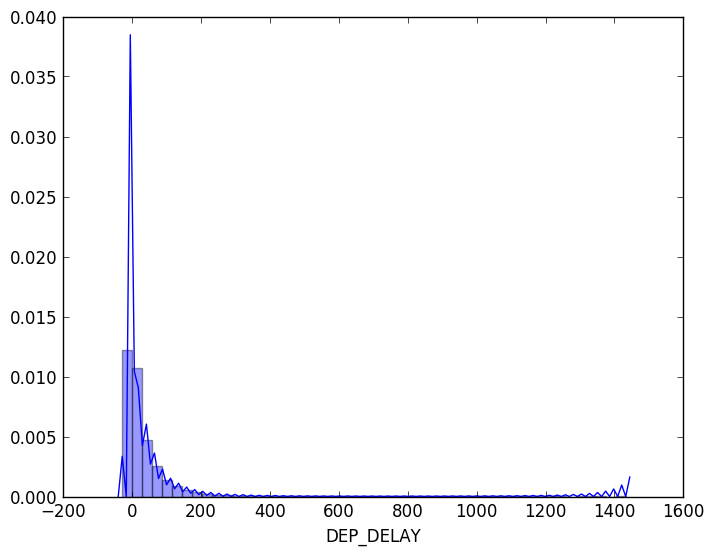

In [22]:
sns.distplot(Xtrain['DEP_DELAY'], kde=True)

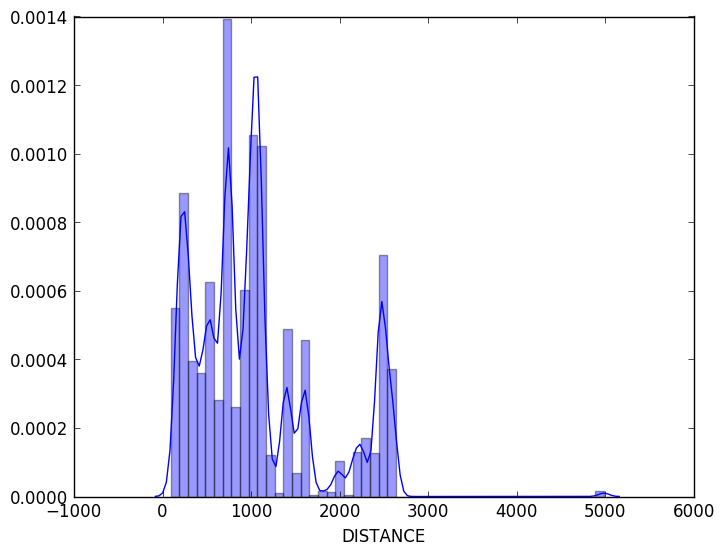

In [23]:
sns.distplot(Xtrain['DISTANCE'], kde=True)

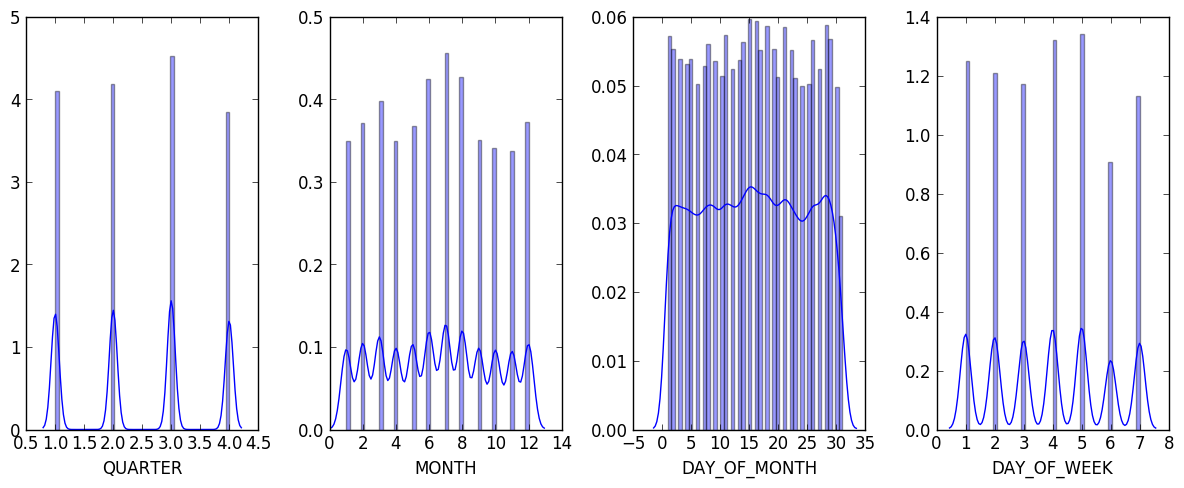

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,5))

for ii, col in enumerate(columns_to_explore[:4]):
    sns.distplot(Xtrain[col], ax=ax[ii], kde=True)  # Use a single feature at a time
fig.tight_layout()
plt.show()

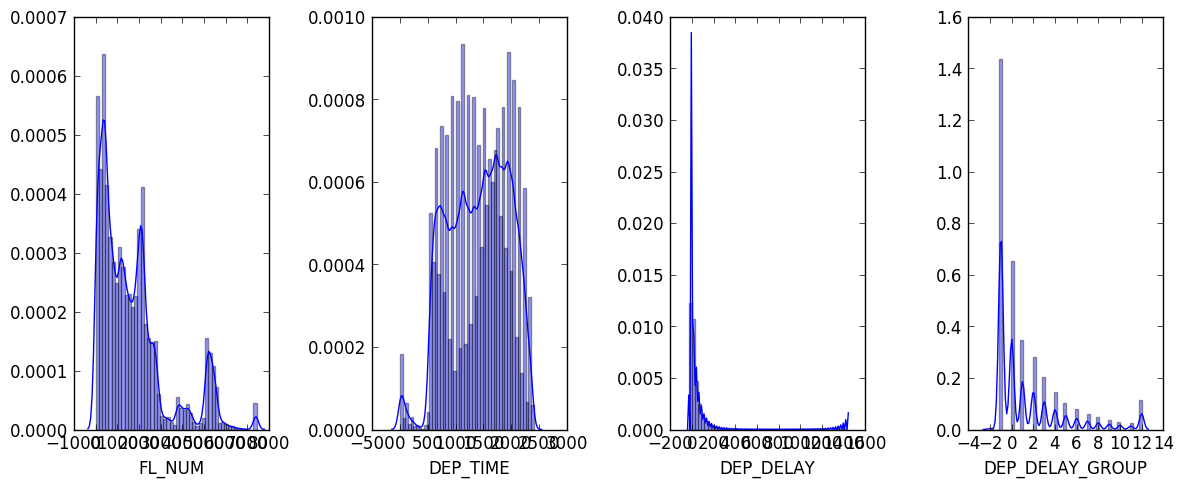

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,5))

for ii, col in enumerate(columns_to_explore[4:8]):
    sns.distplot(Xtrain[col], ax=ax[ii], kde=True)  # Use a single feature at a time
fig.tight_layout()
plt.show()

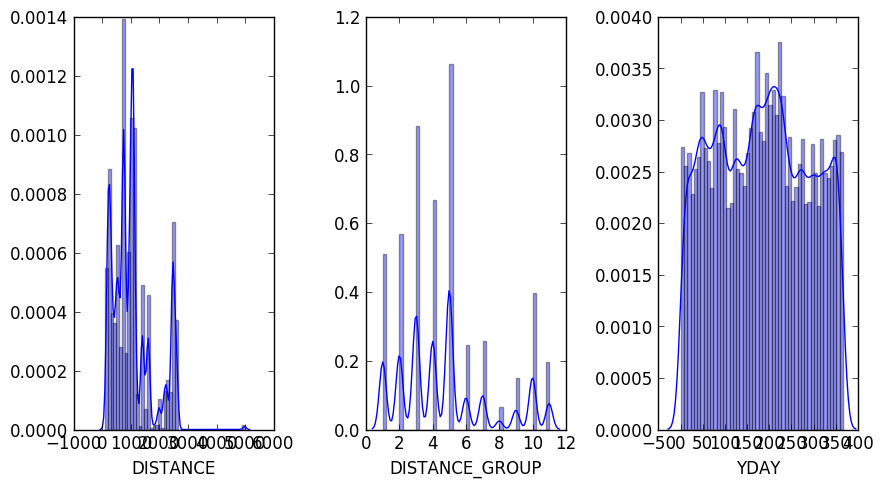

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,5))

for ii, col in enumerate(columns_to_explore[8:]):
    sns.distplot(Xtrain[col], ax=ax[ii], kde=True)  # Use a single feature at a time
fig.tight_layout()
plt.show()

The Departure Delay distribution as well as the Distance distribution indicate the existence of outliers

## Outliers

In [27]:
types = Xtrain[columns_to_explore].dtypes

In [28]:
types = Xtrain[columns_to_explore].dtypes
for col in columns_to_explore:
    types[col] = MyOutliers.getBoundaries(Xtrain[col])
bounds = types.copy()

bounds

QUARTER                   (0.5, 4.5)
MONTH                   (-3.5, 16.5)
DAY_OF_MONTH           (-14.5, 45.5)
DAY_OF_WEEK              (-2.5, 9.5)
FL_NUM             (-2120.5, 4747.5)
DEP_TIME            (-260.0, 3100.0)
DEP_DELAY             (-73.0, 111.0)
DEP_DELAY_GROUP          (-5.5, 6.5)
DISTANCE            (-711.5, 2636.5)
DISTANCE_GROUP          (-1.5, 10.5)
YDAY                 (-173.5, 534.5)
dtype: object

In [29]:
MyOutliers.countOutliersDataPoints(Xtrain, bounds)

QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_NUM             16313
DEP_TIME               0
DEP_DELAY          15053
DEP_DELAY_GROUP    16574
DISTANCE             273
DISTANCE_GROUP      7312
YDAY                   0
dtype: object

In [30]:
for col in columns_to_explore:
    types[col] = MyOutliers().getLooseBoundaries(Xtrain[col])
loose_bounds = types.copy()

loose_bounds

QUARTER            (-1.41217768426, 6.38660712369)
MONTH              (-5.07229963287, 18.0172080641)
DAY_OF_MONTH       (-14.5259945896, 46.0719400133)
DAY_OF_WEEK        (-2.76309122528, 10.5733623892)
FL_NUM             (-2846.91604225, 6165.03595122)
DEP_TIME           (-375.722722588, 3193.37923761)
DEP_DELAY          (-108.223194925, 170.495958306)
DEP_DELAY_GROUP     (-7.24222792365, 9.9031013161)
DISTANCE            (-1066.90650965, 3182.6280675)
DISTANCE_GROUP     (-3.80079760397, 13.2170867596)
YDAY                       (-173.5, 535.986409601)
dtype: object

In [31]:
MyOutliers.countOutliersDataPoints(Xtrain, loose_bounds)

QUARTER               0
MONTH                 0
DAY_OF_MONTH          0
DAY_OF_WEEK           0
FL_NUM             1602
DEP_TIME              0
DEP_DELAY          6732
DEP_DELAY_GROUP    8859
DISTANCE            273
DISTANCE_GROUP        0
YDAY                  0
dtype: object

Comparing the values of the boundaries and paying attention to our distributions we are not fully satisfied that these boundaries are representative of the true outliers. We are going to raise the k hyperparameter and try again.

Note that only the departure delay and the distance make sense to go through this process. The groups (delay and distance) are there only to represent a more compact form of the actual values, so we better check for outliers to the actual values

In [32]:
types = Xtrain[columns_to_explore].dtypes
for col in columns_to_explore:
    types[col] = MyOutliers.getBoundaries(Xtrain[col], k=3)
bounds_k3 = types.copy()

bounds_k3

QUARTER                  (-1.0, 6.0)
MONTH                  (-11.0, 24.0)
DAY_OF_MONTH           (-37.0, 68.0)
DAY_OF_WEEK             (-7.0, 14.0)
FL_NUM             (-4696.0, 7323.0)
DEP_TIME           (-1520.0, 4360.0)
DEP_DELAY            (-142.0, 180.0)
DEP_DELAY_GROUP        (-10.0, 11.0)
DISTANCE           (-1967.0, 3892.0)
DISTANCE_GROUP          (-6.0, 15.0)
YDAY                 (-439.0, 800.0)
dtype: object

In [33]:
MyOutliers.countOutliersDataPoints(Xtrain, bounds_k3)

QUARTER               0
MONTH                 0
DAY_OF_MONTH          0
DAY_OF_WEEK           0
FL_NUM             1233
DEP_TIME              0
DEP_DELAY          5909
DEP_DELAY_GROUP    5997
DISTANCE            273
DISTANCE_GROUP        0
YDAY                  0
dtype: object

In [34]:
MyOutliers.countOutliersDataPoints(Xtrain, bounds_k3[['DEP_DELAY', 'DISTANCE']])

DEP_DELAY    5909
DISTANCE      273
dtype: object

So we have some extreme distances which refer to a few flights at very far destinations which are not indicative of the rest of the flights

In [35]:
bounds_k3['DISTANCE'][1]

3892.0

And we also have some extreme departure delays

In [36]:
bounds_k3['DEP_DELAY'][1]

180.0

.. and departure delays of more than three hours means that something really weird has happened. No need to try and predict the flight delay for these kinds of flights

In [37]:
selected_bounds = bounds_k3[['DEP_DELAY', 'DISTANCE']]
selected_bounds

DEP_DELAY      (-142.0, 180.0)
DISTANCE     (-1967.0, 3892.0)
dtype: object

We are keeping flight number as we are unsure of what kind of role it will play

In [38]:
fatalRowInds = MyOutliers.getOutlierDataPoints(Xtrain, selected_bounds)
print 273 + 5909  #little bigger because some instances coincide
print len(fatalRowInds)

6182
6175


In [39]:
survivors = np.delete(range(len(Xtrain)), list(fatalRowInds))
assert len(Xtrain) == (len(survivors) + len(fatalRowInds))

In [40]:
Xtrain_noOutliers = Xtrain.iloc[survivors]
ytrain_noOutliers = ytrain.iloc[survivors]

## After outliers
Let's check distributions again and see what are the results

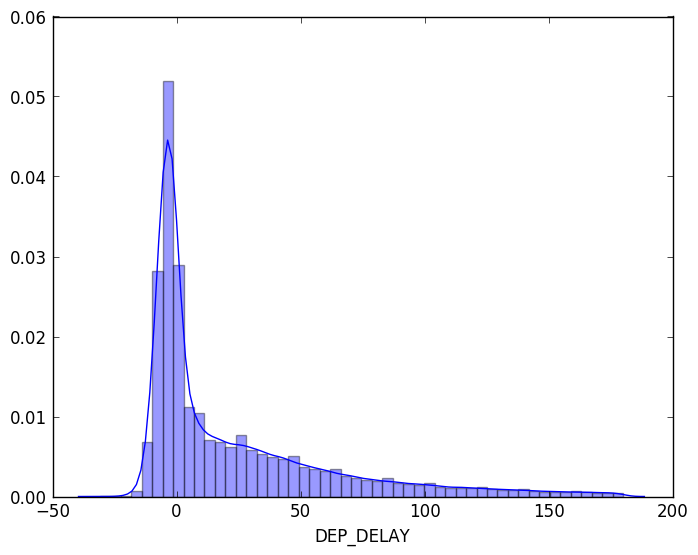

In [41]:
sns.distplot(Xtrain_noOutliers['DEP_DELAY'], kde=True)

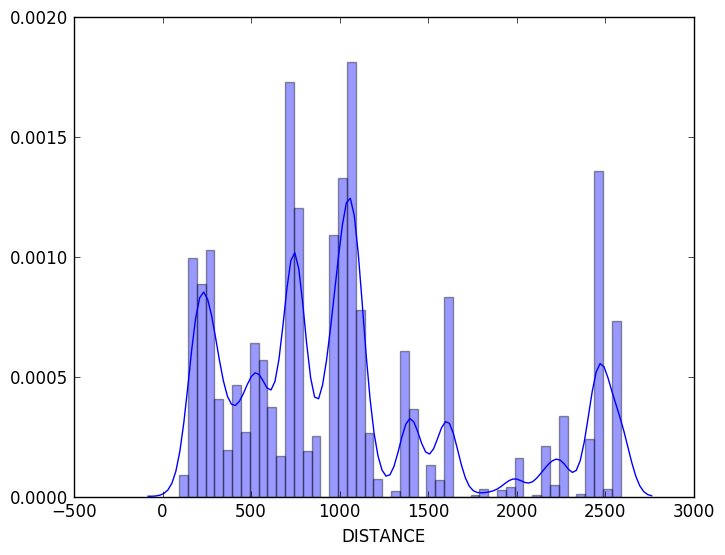

In [42]:
sns.distplot(Xtrain_noOutliers['DISTANCE'], kde=True)

Note that we have not dealt with flight number attribute in purpose since the flight number as it is a bureaucratic invention it is not a real signal which is measured either too low or too high.

However we are not 100% sure for the above statement. A high flight number might indicate that at this specific date we had too many flights, which could contain some information about our target, the arrival delay. Not sure how flight numbers are assigned

## Replot distributions but this time do it per class, here we have a binary case with two classes only

In [44]:
def plotDistsPerClass(colname):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

    sns.distplot(Xtrain_noOutliers[ytrain_noOutliers][colname], ax=ax[1], kde=True, color="r")
    ax[1].set_title('delayed!')
    
    sns.distplot(Xtrain_noOutliers[ytrain_noOutliers == False][colname], ax=ax[0], kde=True, color="b")
    ax[0].set_title('non delayed')
    
    #fig.tight_layout()
    plt.show()

In [52]:
def plotBothDists(colname, bins=None):
    fig, ax = plt.subplots(figsize=(12,9))
    #sns.despine(left=True)
    #plt.hold(True)
    
    ax.hold(True)
    sns.distplot(Xtrain_noOutliers[ytrain_noOutliers][colname], kde=True, bins=bins,  #ax=ax,
                 color = "r", hist_kws={"color": "r", "alpha": 0.3}, kde_kws={"color": "r", "alpha": 1.})
    ax.hold(True)
    sns.distplot(Xtrain_noOutliers[ytrain_noOutliers == False][colname], bins=bins,  kde=True, #ax=ax,
                 hist_kws={"alpha": 0.3}, kde_kws={"color": "b", "alpha": 1.}, color = "b"
                )
    
    ax.hold(False)
    ax.legend(['delayed', 'arrived on time'])
    ax.grid(True)
    ax.set_title('Distribution of {}'.format(colname))
    
    plt.show()

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


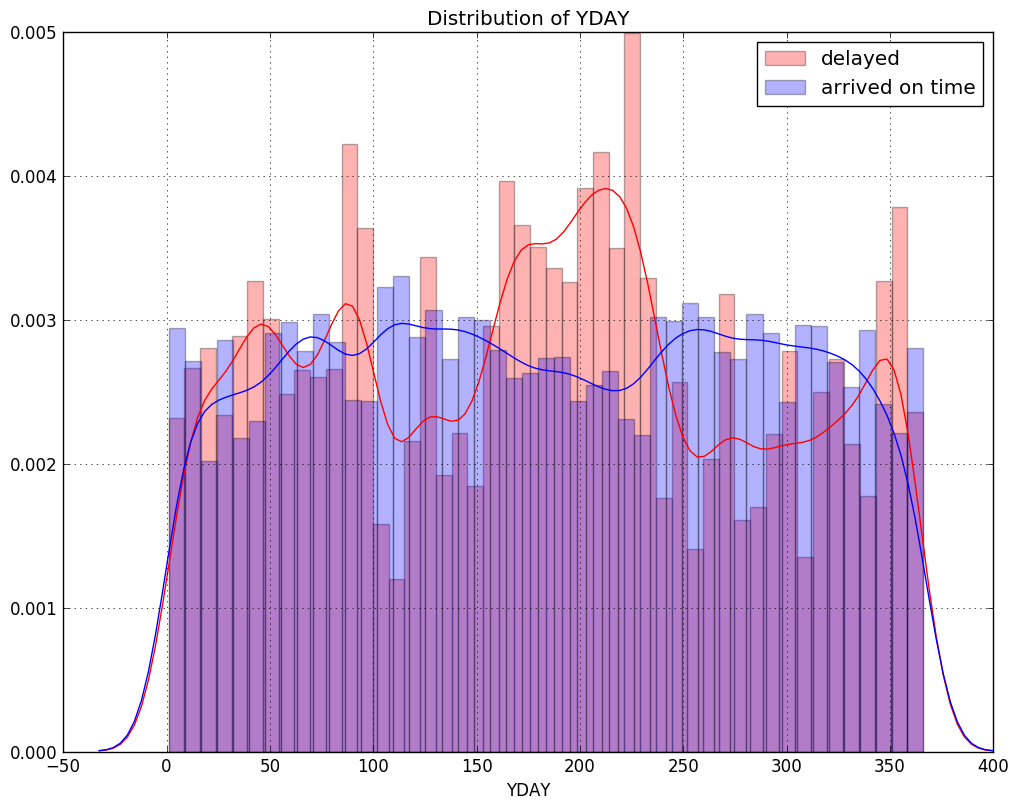

In [53]:
plotBothDists('YDAY')

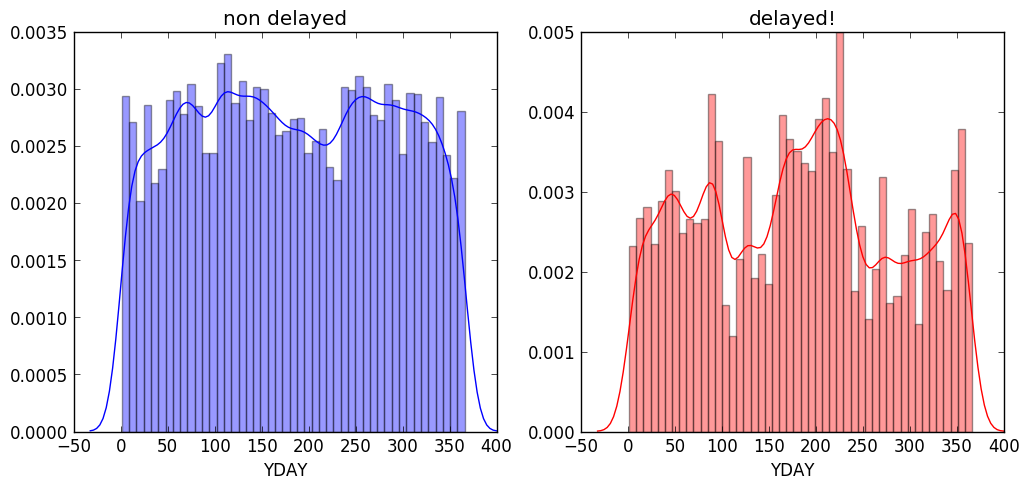

In [54]:
plotDistsPerClass('YDAY') # This is also a useful feature as some days of the year are not affected by delays
                          # while other days are doomed

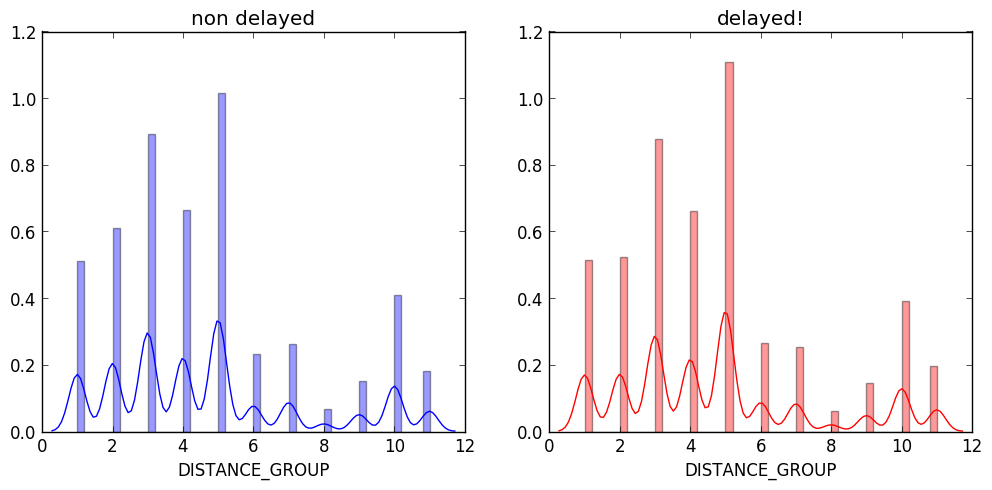

In [55]:
plotDistsPerClass('DISTANCE_GROUP')

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


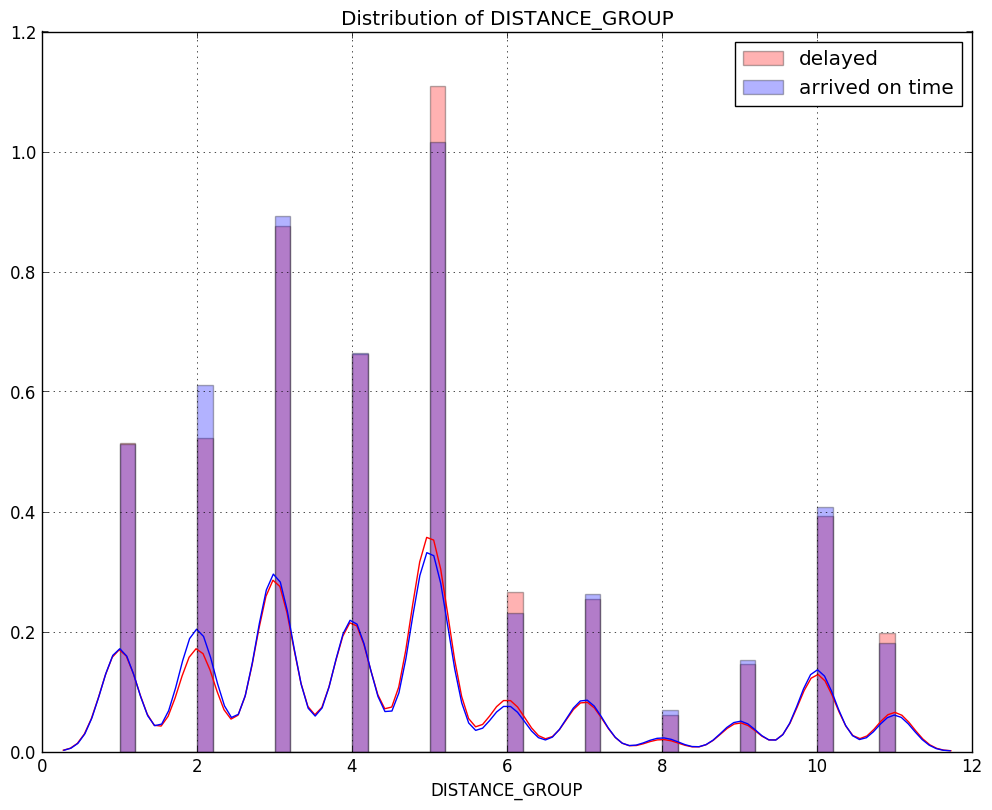

In [56]:
plotBothDists('DISTANCE_GROUP')

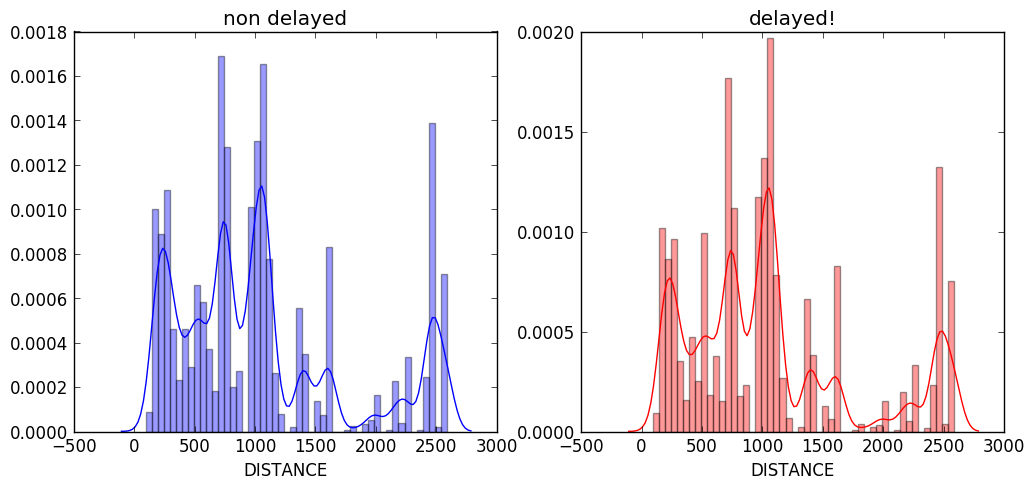

In [57]:
plotDistsPerClass('DISTANCE')

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


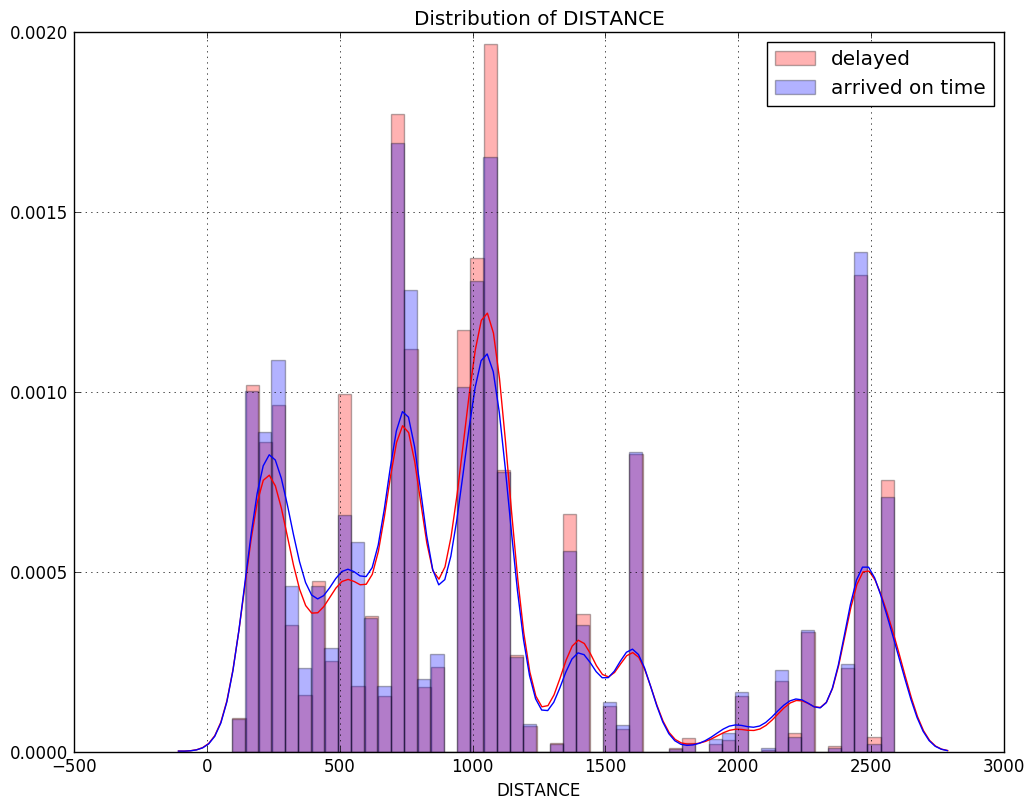

In [58]:
plotBothDists('DISTANCE')

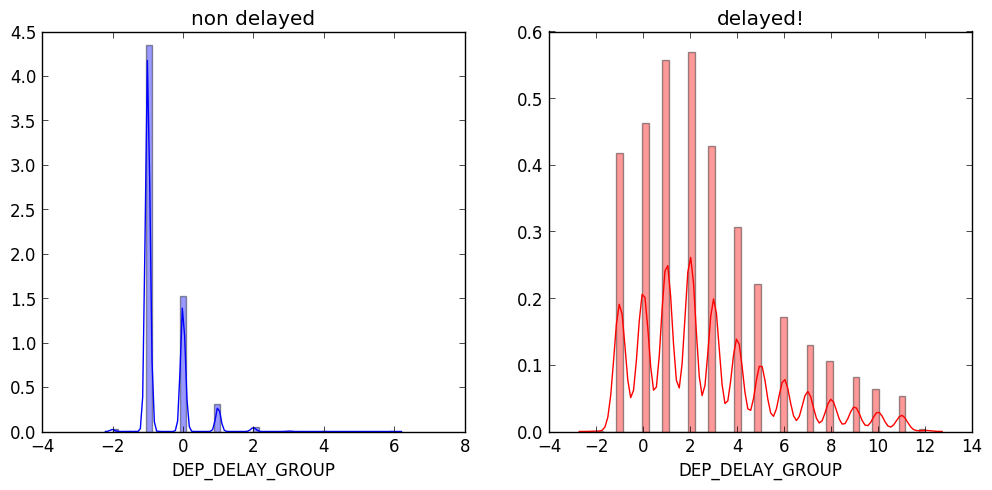

In [59]:
plotDistsPerClass('DEP_DELAY_GROUP')

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


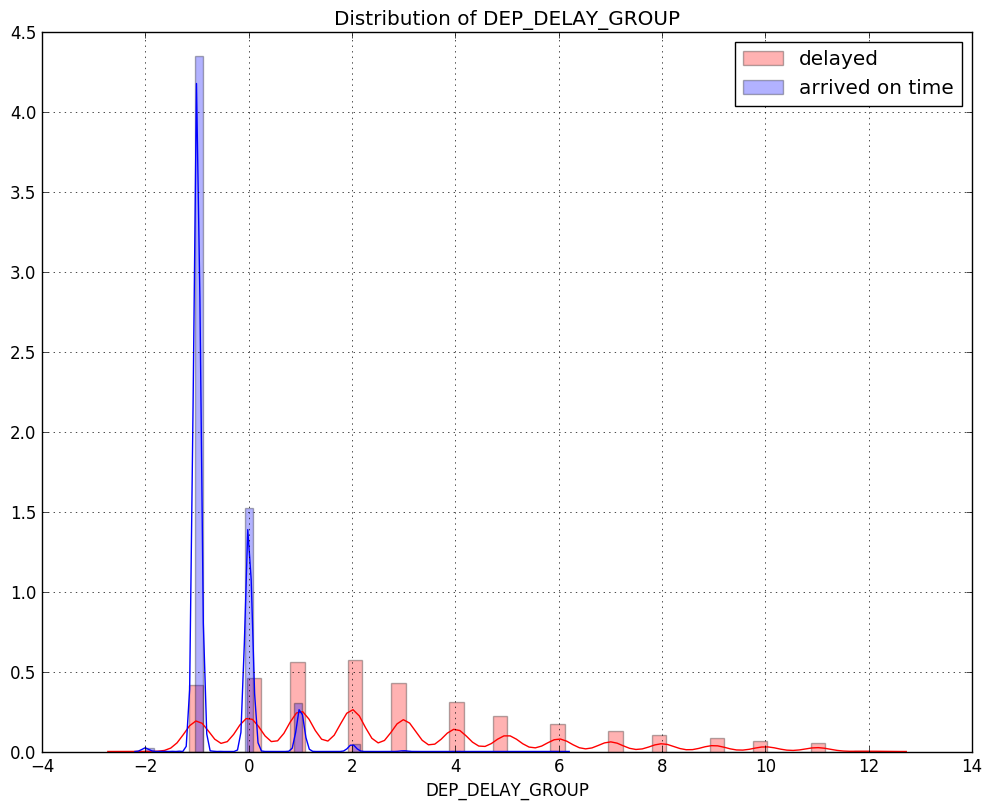

In [60]:
plotBothDists('DEP_DELAY_GROUP')

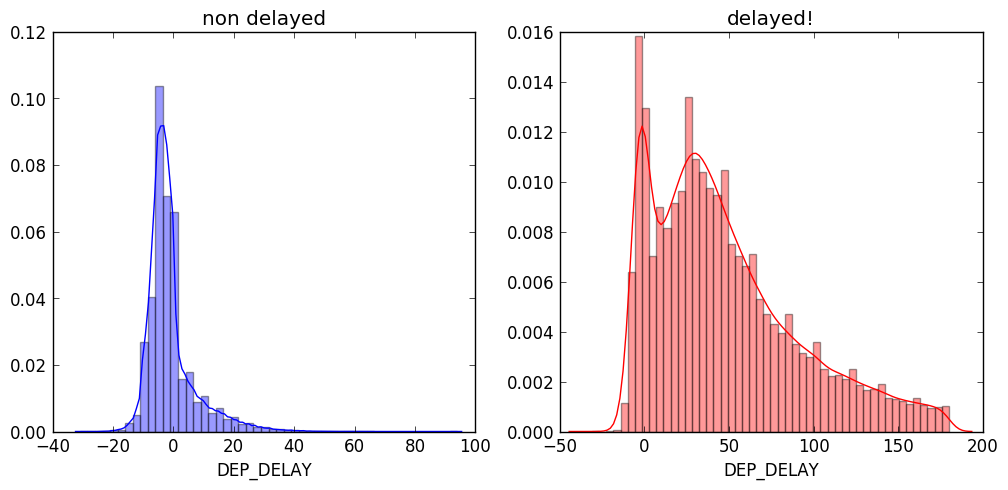

In [61]:
plotDistsPerClass('DEP_DELAY')  #DEPARTURE DELAY (AS EXPECTED) IS VERY INDICATIVE OF THE ARRIVAL DELAY

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


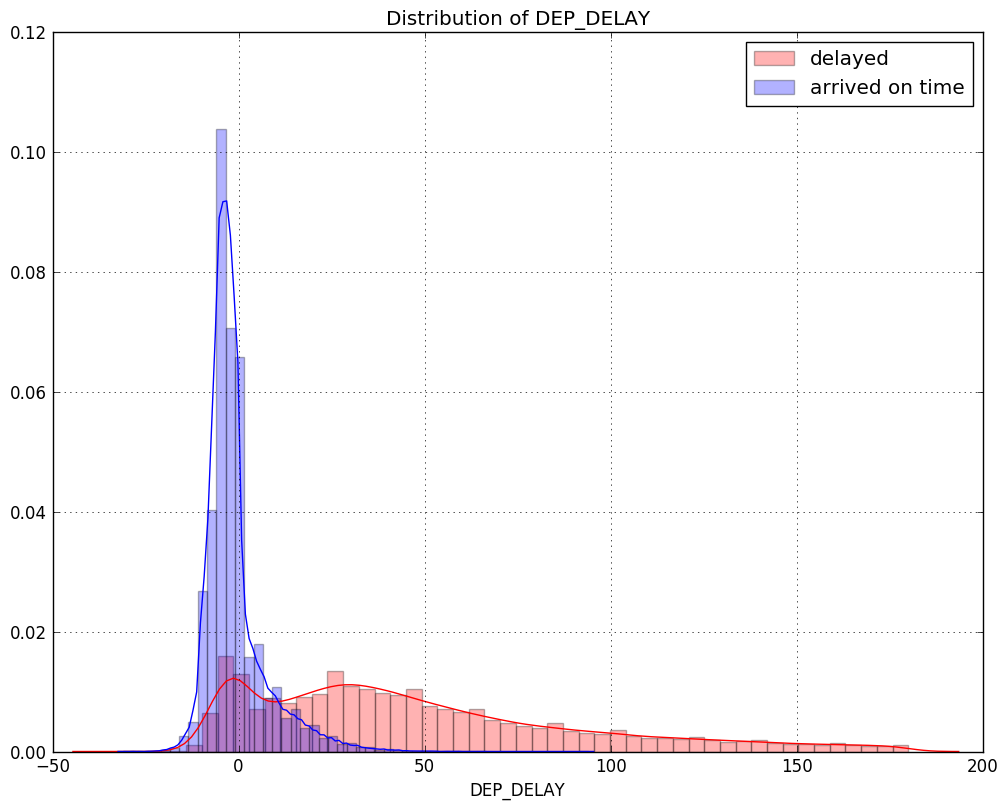

In [62]:
plotBothDists('DEP_DELAY')

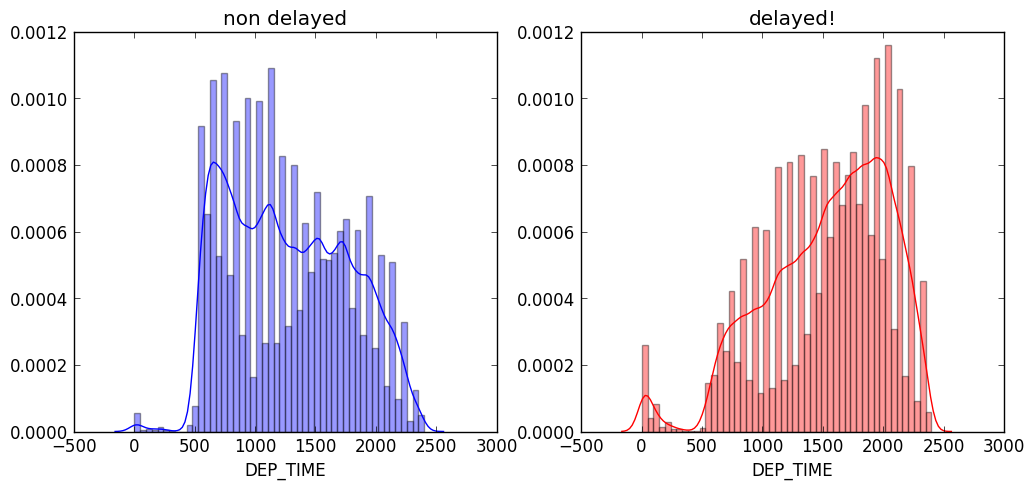

In [63]:
plotDistsPerClass('DEP_TIME')  #DEPARTURE TIME IS VERY INDICATIVE OF THE ARRIVAL DELAY

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


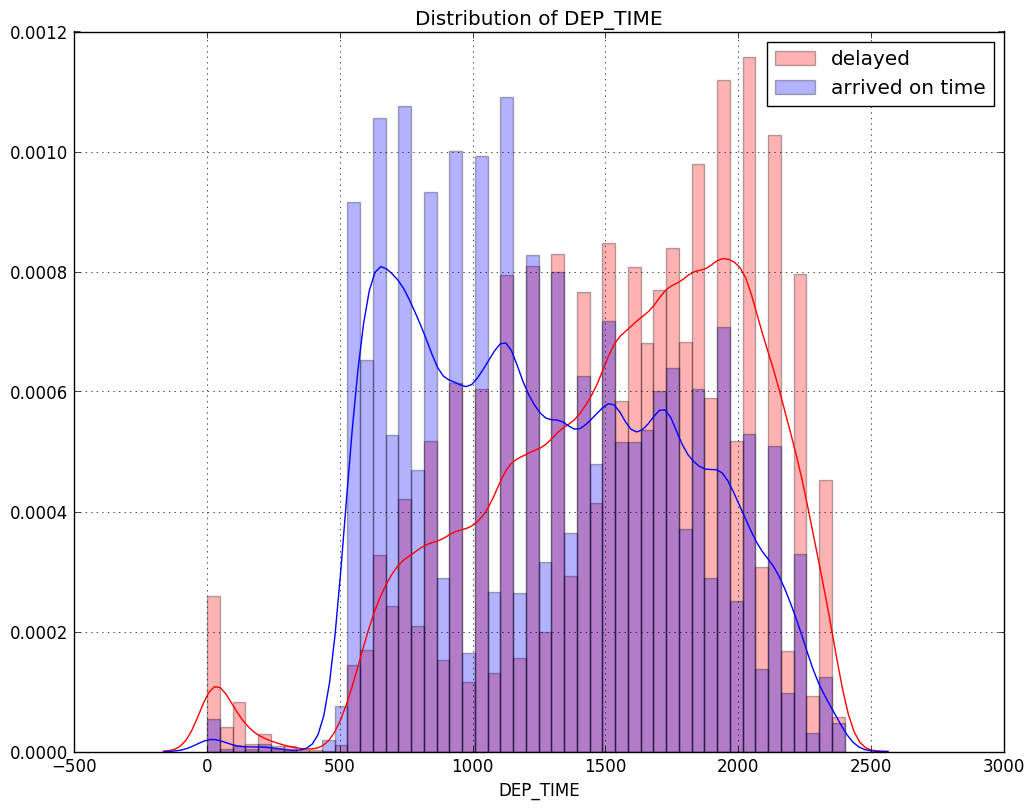

In [64]:
plotBothDists('DEP_TIME')

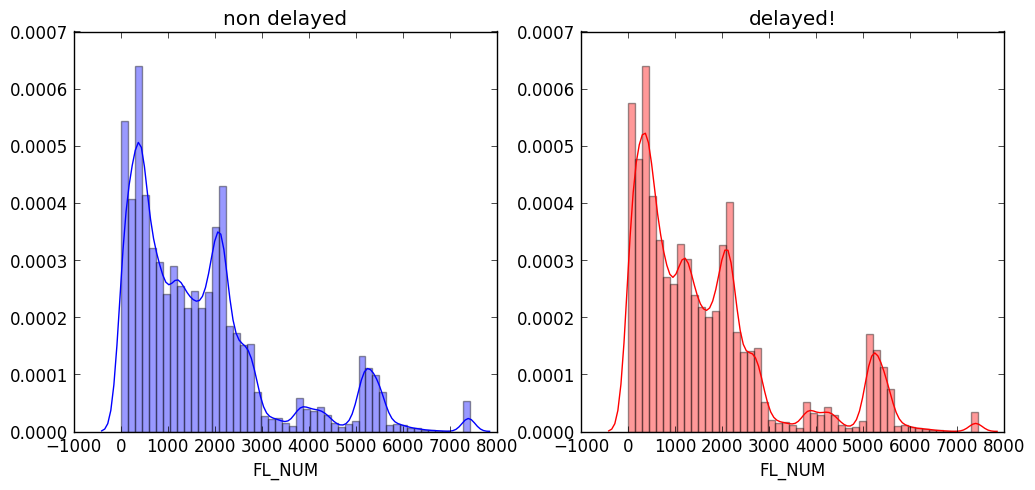

In [65]:
plotDistsPerClass('FL_NUM')

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


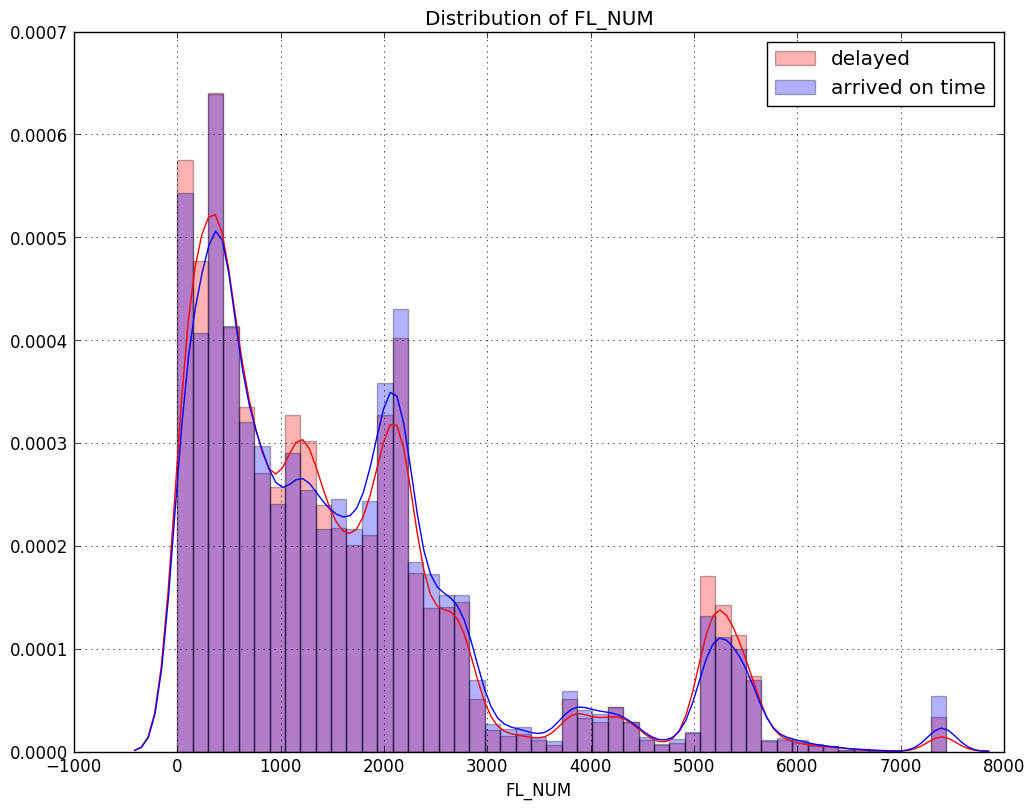

In [66]:
plotBothDists('FL_NUM')

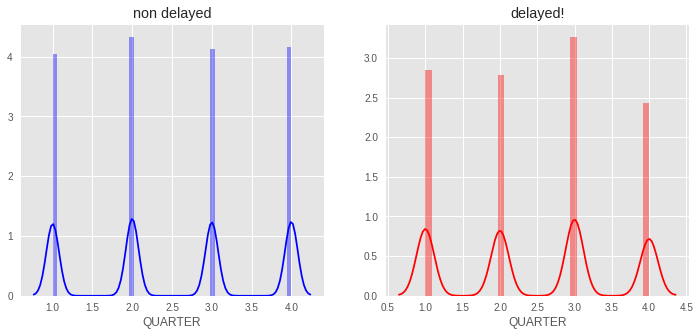

In [55]:
plotDistsPerClass('QUARTER')

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


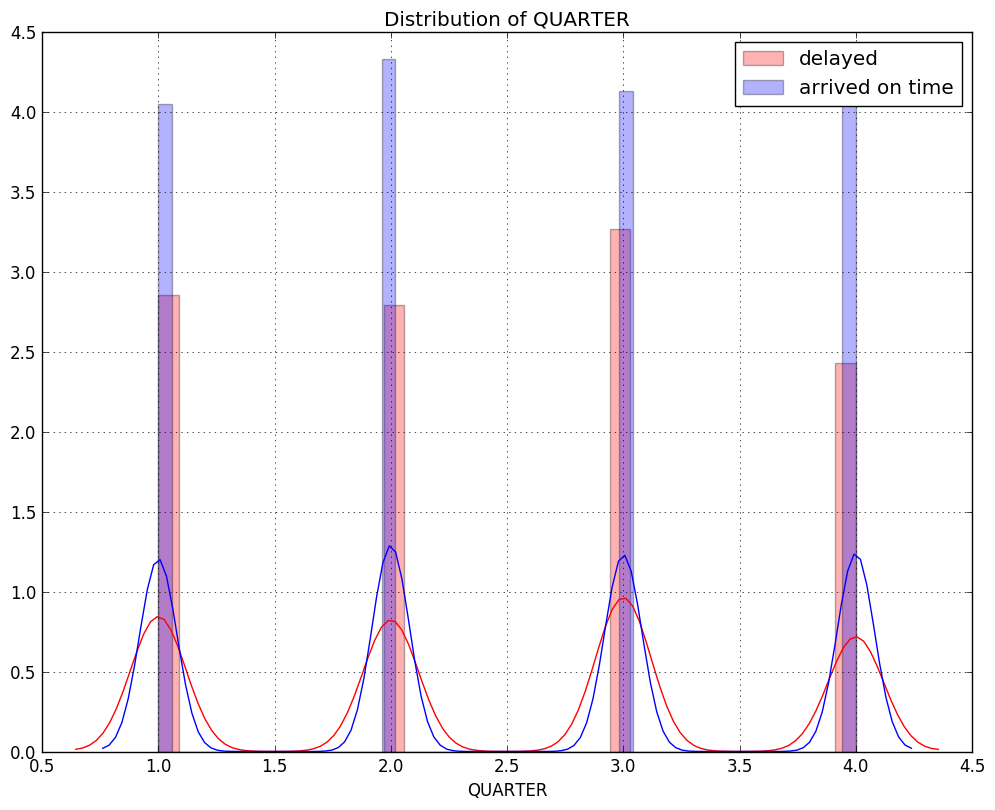

In [67]:
plotBothDists('QUARTER')

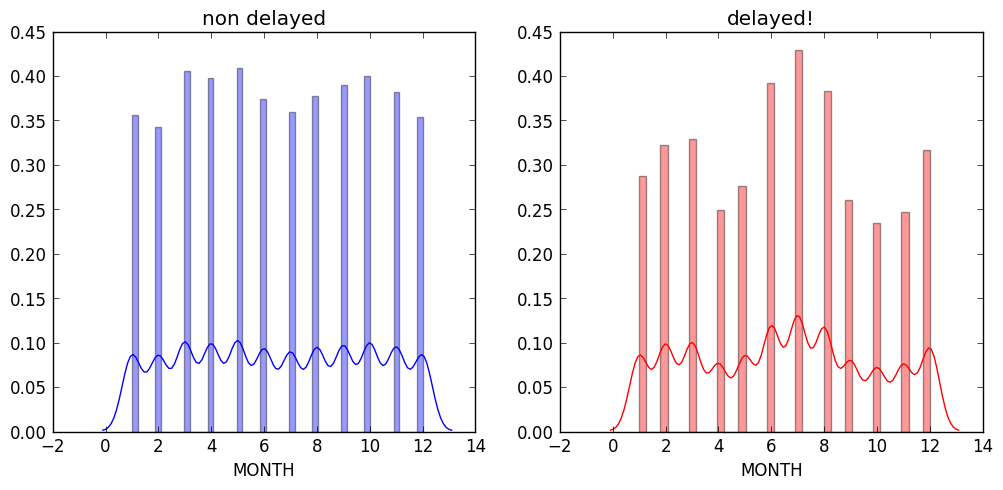

In [68]:
plotDistsPerClass('MONTH')

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


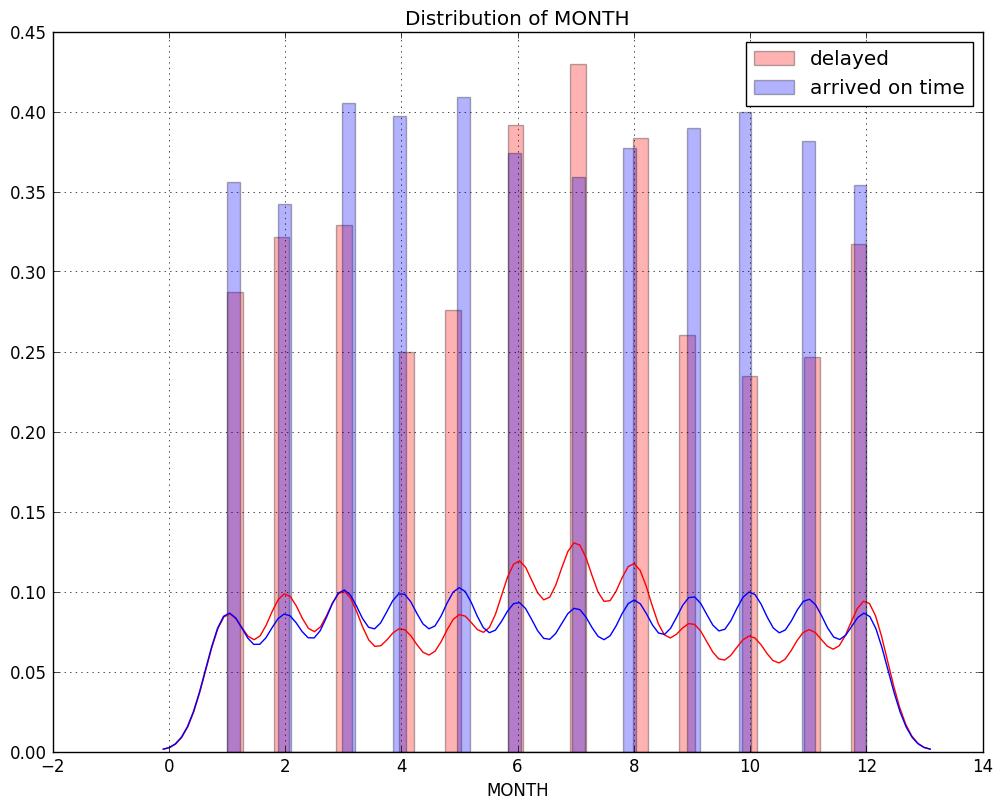

In [69]:
plotBothDists('MONTH')

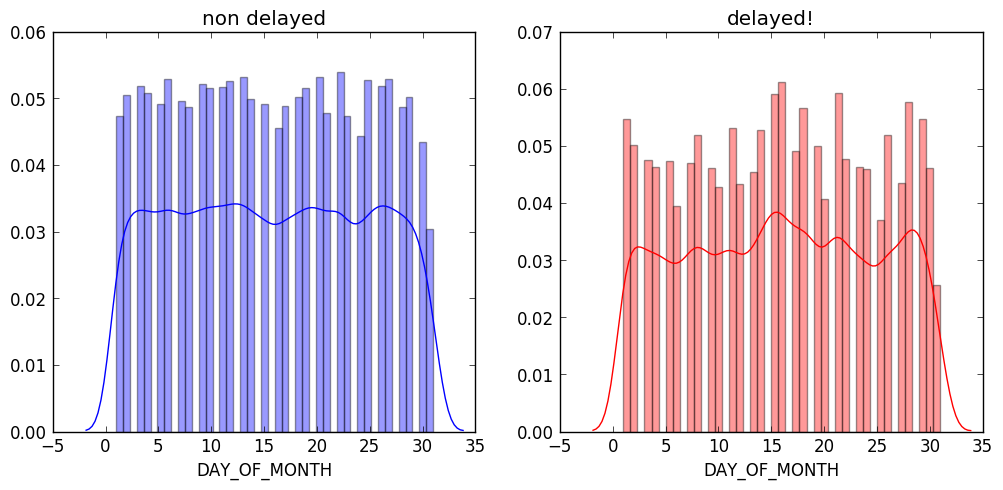

In [70]:
plotDistsPerClass('DAY_OF_MONTH')

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


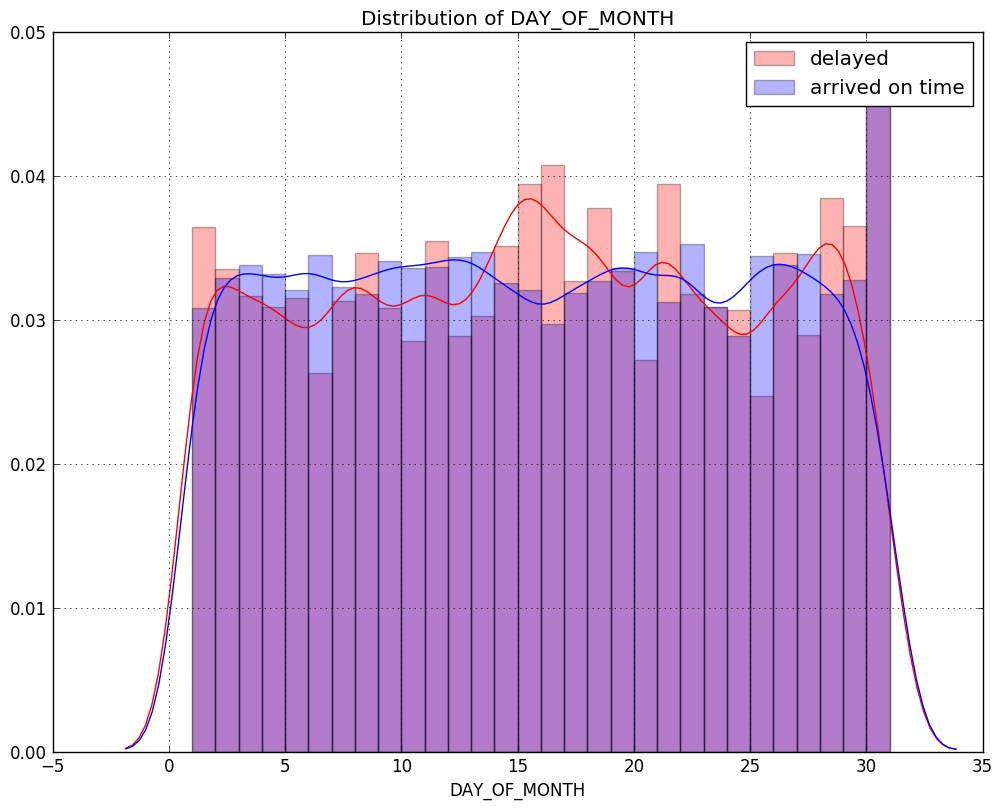

In [71]:
plotBothDists('DAY_OF_MONTH', bins=30)

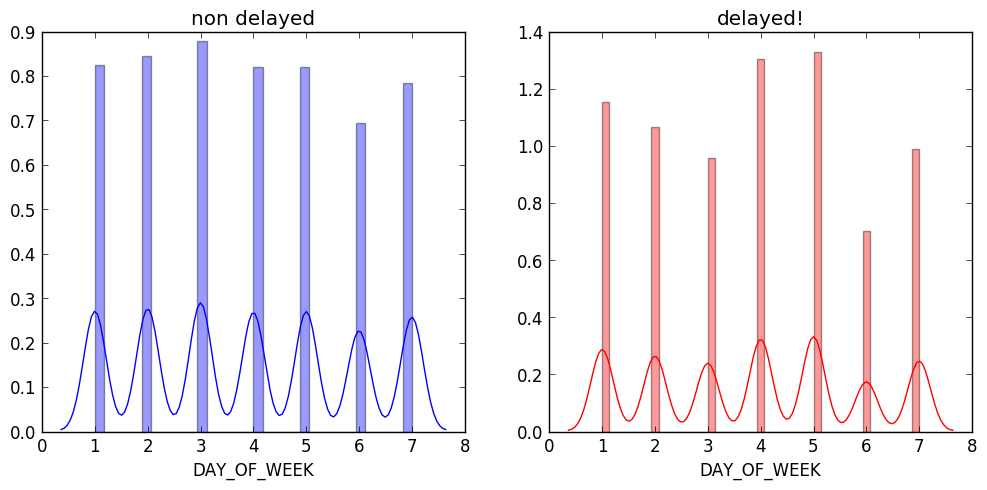

In [72]:
plotDistsPerClass('DAY_OF_WEEK')

/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/student/anaconda2/envs/dme/lib/python2.7/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


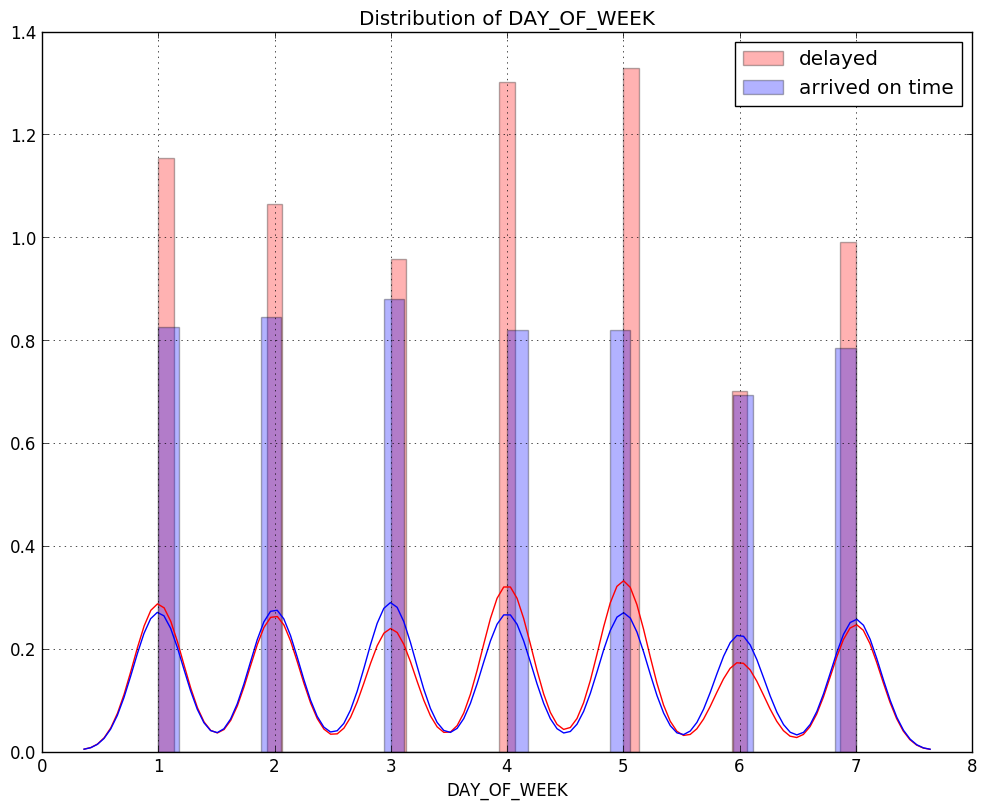

In [73]:
plotBothDists('DAY_OF_WEEK')

## Correlations
Let's pick a few attributes to see if they are correlated. We are not picking to plot month against day of year since we already know that this is correlated

In [149]:
myvars = [
    #QUARTER
    #MONTH
    #DAY_OF_MONTH
    #DAY_OF_WEEK
    #FL_NUM
    'DEP_TIME',
    'DEP_DELAY',
    #DEP_DELAY_GROUP
    'DISTANCE',
    #DISTANCE_GROUP
    'YDAY',
]

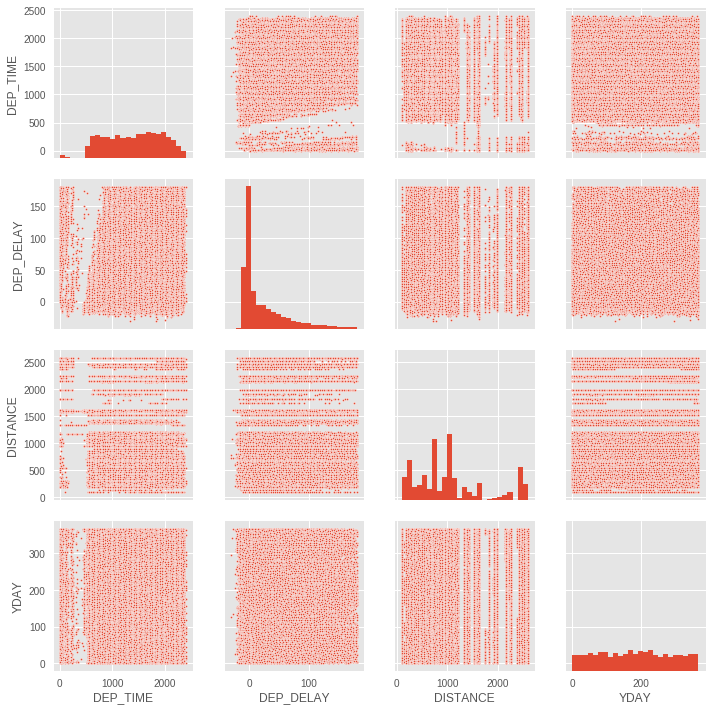

In [150]:
sns.pairplot(Xtrain_noOutliers, vars = myvars,
             # Set variables of interest, marker size and bins for histograms
             plot_kws={'s' : 6}, diag_kws={'bins' : 25})
plt.show()

In [152]:
data_noOutliers = pd.concat((Xtrain_noOutliers, ytrain_noOutliers), axis=1)
data_noOutliers.shape

(180133, 533)

Let's replot with the class being separated

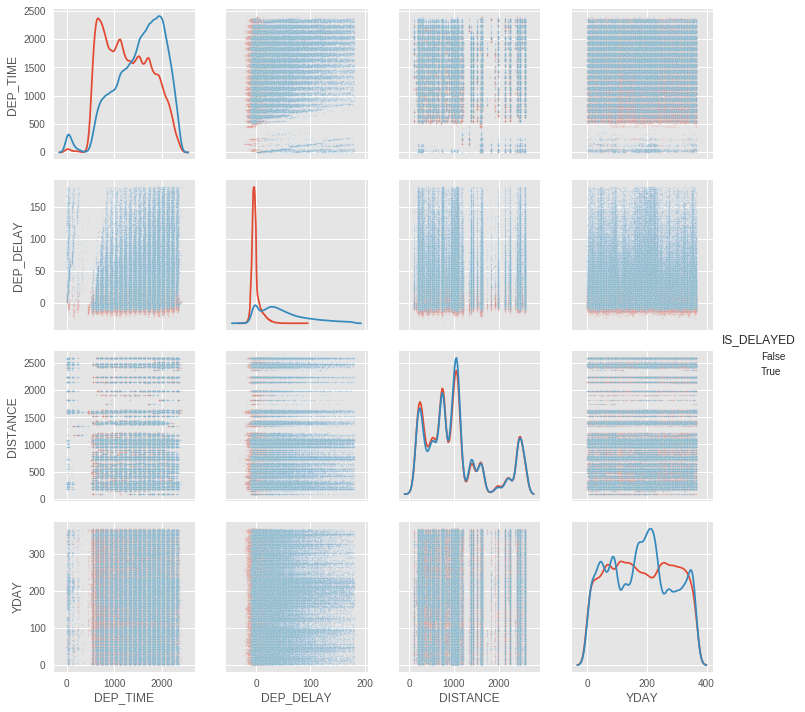

In [155]:
sns.pairplot(data_noOutliers, vars = myvars, hue=target_col, diag_kind='kde',
             # Set variables of interest, marker size and bins for histograms
             plot_kws={'hold' : True, 'marker': 'o', 'alpha': 0.1, 's' : 2})
             #plot_kws={}, diag_kws={'bins' : 25})
plt.show()

Among the data we picked we do not see any strong correlations, for example it appears that on any year day you could see any kind of distances and any kind of departure delays

Now let's see what is going on with the rest of the values which we considered them as correlated

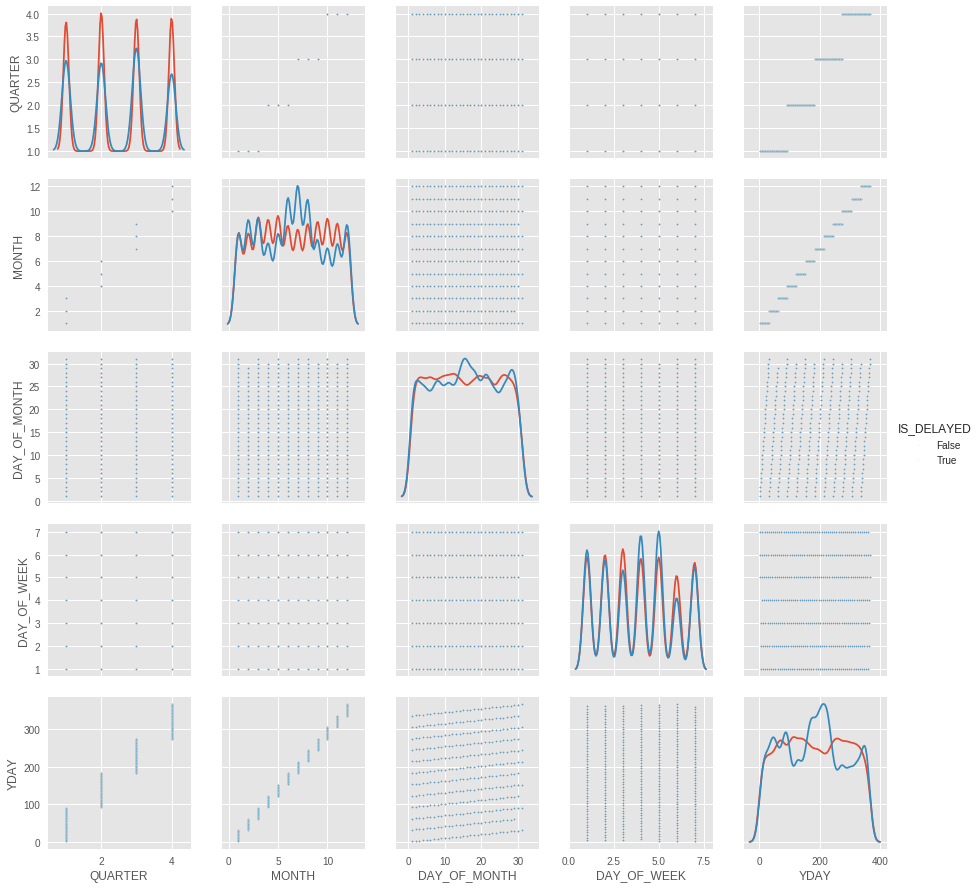

In [158]:
sns.pairplot(data_noOutliers,
             vars = ['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'YDAY'],
             hue=target_col, diag_kind='kde',
             # Set variables of interest, marker size and bins for histograms
             plot_kws={'hold' : True, 'marker': 'o', 'alpha': 0.1, 's' : 2},)
plt.show()

In [159]:
# data_noOutliers.to_csv(
#     os.path.realpath(os.path.join(os.getcwd(), '../Data', 'binary_train_data_numerical_no_outliers.csv')),
#     index=False)

# Boxcox

We are not doing any box cox for the moment, only testing it for the moment to see how it might work

In [55]:
from scipy.stats import boxcox

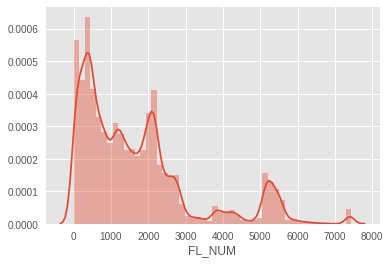

In [56]:
sns.distplot(Xtrain['FL_NUM'], kde=True)

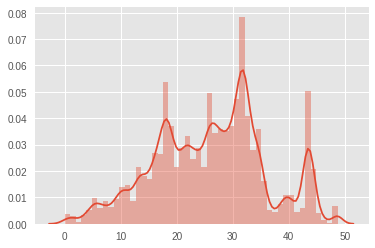

In [58]:
fl_trans, _ = boxcox(Xtrain['FL_NUM'])
sns.distplot(fl_trans, kde=True)